# Cleaning and Analyzing Employee Exit Surveys

I will be working with exit surveys from employees of the Department of Education, Training and Employment(DETE) and the Technical and Further Education(TAFE) institute in Queensland, Australia. 

I will play role as a data analyst and pretend that our stakeholders want to know the following:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The stakeholders will need me to combine the results of both surveys to answer these questions. I will need to clean the data, then get to analyzing it. 

In [1]:
#Importing the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Reading in the datasets
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')


**Now to explore the data**

In [2]:
dete_survey.head() #Making sure the dataset was read properly.

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
tafe_survey.head() #Making sure the next dataset was read properly

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [4]:
dete_survey.info() #Getting information on the DETE dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [5]:
tafe_survey.info() #Getting info on the TAFE dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [6]:
dete_survey.isnull().sum() #Checking for any missing values in the DETE dataset.

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [7]:
tafe_survey.isnull().sum() #Checking for any missing values in the TAFE dataset. 

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

## Here are my observations after exploring the data:
* These are huge datasets with a substantial amount of columns that will need to be cleaned/dropped.
* There are values that say "Not Stated" or have "-" instead of being NaN/NONE types.
* Some of the columns are similar but the names are different. They can still be combined to one dataframe.
* There are not many 'int' or 'float' types in the dataframes. Many of the numbers are within a range while also being object types.  
* There are multiple columns/answers that indicate an empployee resigned because they were dissatisfied. 


**First I'll go ahead and get rid of the "Not Stated" string and replace it with `NaN`.**

In [8]:
#replacing 'NOT STATED' with the NaN value.
dete_survey = pd.read_csv('dete_survey.csv', na_values=['Not Stated']) 

#displaying the changes
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


**Now I'll go ahead and drop some of the columns we will not be using.**

In [9]:
#dropping columns from the `dete_survey_updated` dataset.
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

#dropping columns from the `tafe_survey_updated` dataset. 
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

I got rid of these specific rows because they seemed to be redundant in terms of Employee satisfaction, or they were just completely irrelevant to the questions I'm trying to answer. 

**The results are displayed below.**

In [10]:
#displaying the `dete_survey_updated` dataset. 
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [11]:
#displaying the `tafe_survey_updated` dataset. 
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


**Now to format the columns from both datasets so they can match**

In [12]:
#Cleaning dete_survey_updated dataframe
dete_cols = dete_survey_updated.columns
dete_cols = dete_cols.str.lower()
dete_cols = dete_cols.str.strip()
dete_cols = dete_cols.str.replace(' ', '_')
dete_survey_updated.columns = dete_cols

dete_survey_updated.columns #Displaying the results

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [13]:
#Renaming the columns in `tafe_survey_updated` to match the columns in `dete_survey_updated.
tafe_survey_updated = tafe_survey_updated.rename(columns={'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})

In [14]:
#Displaying the new column names for the dataset. 
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

The rows needed to be changed into uniform format to make it easier to find and analyze them. Now to filter the data.

**Now to explore the `separationtype` column in both datasets.**
 * The dataset defines `separationtype"` as the reason the employees left. 

In [15]:
#Displaying the frequency of the values in the `separationtype` column.
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [16]:
#Displaying the frequency of the values in the `separationtype` column. 
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

**Creating a new dataframes called 'dete_resignations' and 'tafe_resignations] to filter for values that contain the string 'Resignation'**

In [17]:
#I'm dropping the NaN types because the code wouldn't run otherwise.
dete_copy = dete_survey_updated.copy()

#Creating a new data frame called 'dete_resignations' to filter values that contain the string 'Resignation'. 
dete_resignations = dete_copy[dete_copy['separationtype'].str.contains('Resignation')].copy()


In [18]:
#I'm dropping the NaN types because the code wouldn't run otherwise.
tafe_copy = tafe_survey_updated.copy().dropna()  

#creating new dataframe that's filtering the column for rows that contain the word 'Resignation'. 
tafe_resignations = tafe_copy[tafe_copy['separationtype'].str.contains('Resignation')].copy()

I filtered the data to keep all of the rows that contain "Resignation". This was done to focus on the resigation aspect of the data. 


**Now to clean up the `'cease_date'` column in both datasets**

In [19]:
#Exploring the data in dete_resignations['cease_date']
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
2010         1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [20]:
#Cleaning the columns to only show the year.
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]

#Changing the data type from a string to a float. 
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

In [21]:
#Getting the frequency of the years in dete_resignations['cease_date']
dete_resignations['cease_date'].value_counts().sort_values()

2006.0      1
2010.0      2
2014.0     22
2012.0    129
2013.0    146
Name: cease_date, dtype: int64

In [22]:
#Getting the frequency of the years in tafe_resignations['cease_date']
tafe_resignations['cease_date'].value_counts().sort_values()

2009.0      2
2013.0     46
2010.0     49
2012.0     86
2011.0    105
Name: cease_date, dtype: int64

It looks like we have an accurate representation for the frequency of the `cease_date` column in both dataframes. There are little to no outliers in both dataframes. 

In [23]:
#Now to get the frequencies of dete_resignations['dete_start_date']
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [24]:
#Getting the difference between 'cease_date' and 'start_date' to get the years spent at the job. 
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

#Displaying the frequency of the years in descended order.
dete_resignations['institute_service'].value_counts().sort_values(ascending=False)

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
8.0      8
13.0     8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
18.0     5
16.0     5
23.0     4
24.0     4
11.0     4
39.0     3
19.0     3
21.0     3
32.0     3
30.0     2
28.0     2
26.0     2
25.0     2
36.0     2
41.0     1
34.0     1
38.0     1
35.0     1
49.0     1
27.0     1
42.0     1
33.0     1
29.0     1
31.0     1
Name: institute_service, dtype: int64

The first column is the difference between the `cease_date` and the `dete_start_date`. I put the results in ascending order to paint a picture of the amount of years spent at the insitutions. It looks like the majority of the employees end up leaving before 10 years. 

### Identiying Dissatisfied Employees

Now to identify which employees left because they were dissatisfied with the job. I will be looking at columns from both dataframes and change the values to say:
* `True`: A person resigned because they were dissatisfied with the job.
* `False`: A person resigned because of a reason other thean dissatisfaction with the job. 
* `NaN`: Indicates the value is missing 

In [25]:
#Getting the frequency of values in dete_resignations['Contributing Factors. Dissatisfaction'] column. 
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         245
Contributing Factors. Dissatisfaction      43
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [26]:
#Displaying frequencies in tafe_resignations['Contributing Factors. Job Dissatisfaction']
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      233
Job Dissatisfaction     55
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

I'm going to use a function called `update_vals` to update the values to `True`, `False`, or `NaN`.

In [27]:
#Creating the function to update the values to True, False, or NaN
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True

Now to implement this function by using `applymap()`.

In [28]:
#Creating a new column to called 'dissatisfied' to store all the True and False values. 
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

In [29]:
#Displaying the first 5 rows to see if the 'dissatisfied' column was created witht the right values. 
tafe_resignations_up.head(5)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4,False


In [30]:

dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis=1, skipna=False)

dete_resignations_up = dete_resignations.copy()
dete_resignations_up.head(15)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
12,13,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,14.0,False
14,15,Resignation-Other employer,2012.0,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,5.0,True
16,17,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN,NaN,True
20,21,Resignation-Other employer,2012.0,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,True,Male,56-60,NaN,NaN,NaN,NaN,NaN,30.0,False
21,22,Resignation-Other reasons,2012.0,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,Female,51-55,NaN,NaN,NaN,NaN,NaN,32.0,False


In [31]:
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    211
True      77
Name: dissatisfied, dtype: int64

In [32]:
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

These are the results for the 2 dataframes. I wanted to figure out if people resigned from their insitutions because there was a bad experience. If the results came back as `True`, that would mean that there was a bad experience. If `False`, there wasn't any bad experience that caused the workers to leave. 

After that, I put the results into a new column named `'dissatisfied'`. The frequency of the `True` and `False` values can be seen right under the dataframes that were displayed. 

The `tafe_resignations` dataframe had far more `False` values than `True`, meaning many workers **did not** leave because of a negative experience at the institution. On the other hand, the `dete_resignations` dataframe was almost
50% split between `True` and `False`.

### Now to Combine the "dete" and "tafe" dataframes

In [33]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
#Did this to tell the difference between the two datasets when they're combined. 

In [34]:
dete_resignations_up.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service', 'dissatisfied',
       'institute'],
      dtype='object')

In [35]:
tafe_resignations_up.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service', 'dissatisfied', 'institute'],
      dtype='object')

In [36]:
#Combining the datasets
combined = pd.concat([dete_resignations_up, tafe_resignations_up])

#displaying the changes
combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
3,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
combined_updated = combined.dropna(thresh=500, axis='columns').copy()
#This is to get rid of columns that have over 500 NAN values. 

In [38]:

combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
3,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
5,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
8,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
9,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
11,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


**Dataframes combined steps**
1. Made a column named institue in the "DETE" and "TAFE" dataframes to tell them apart once they are combined. 
2. Combined the dataframes using the `pd.concat` function.
3. Dropped all columns that had over 500 `NAN` values using `df.dropna` in the `combined` dataframe. 

Now I want to turn the number of years in the `'institute_service'` column into career stage categories. 

In [39]:
combined_updated['institute_service'].value_counts(dropna=False).head(10)

Less than 1 year    73
1-2                 64
3-4                 63
NaN                 38
5-6                 33
11-20               24
5.0                 23
1.0                 22
7-10                21
0.0                 20
Name: institute_service, dtype: int64

In [40]:
#Extracting the digits from the 'institute_service column'.
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')

#Changing the value type of 'institute_service_up' to a float.
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')


#Displaying the changes. 
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     28
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [41]:
# creating a function to categories the amount of years the employees worked. 
def categories(value):
    
    if 3 < value <= 6:
        return 'Experienced'
    elif 6 < value <= 10:
        return 'Established'
    elif 11 <= value:
        return 'Veteran'
    elif pd.isnull(value):
        return np.nan
    elif value <= 3:
        return 'New Employee'

#Plugging in the function to categories 'institute_service_up' column and assigning it to a new column named 'service_cat'.
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(categories)

In [42]:
#Getting the frequency of the categories in combined_updated['service_cat'] column. 
combined_updated['service_cat'].value_counts()

New Employee    276
Veteran         134
Experienced      89
Established      62
Name: service_cat, dtype: int64

I categorized the amount of years employees stayed at their institutions into four categories. 
* `New Employee` had the highest frequency showing that most of the employees left after working there for up to 3 years. 
* `Experienced` came in third with a frequency of 89. I set this category to collect values between 6 and 10 years. 
* `Estalished` came in last with a frequency of 62. This one had people who worked at their institutions between 6 to 10 years. 
* `Veteren` was the runner up. I had this category set to working at the institution for 11 years or more. Its suprising to se

#### Now to dive into the dissatisfied column to see how it correlates with the categories above. 

In [43]:
# Getting the frequency of the True and False values in the dissatisfied column.
combined_updated['dissatisfied'].value_counts(dropna=False)

False    373
True     226
Name: dissatisfied, dtype: int64

In [44]:
#Replacing the dashes(-) with the 'False' value.
combined_updated.fillna(False)

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,institute_service_up,service_cat
3,4.000000e+00,Resignation-Other reasons,2012,Teacher,Permanent Full-time,Female,36-40,7,False,DETE,7,Established
5,6.000000e+00,Resignation-Other reasons,2012,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE,18,Veteran
8,9.000000e+00,Resignation-Other reasons,2012,Teacher,Permanent Full-time,Female,31-35,3,False,DETE,3,New Employee
9,1.000000e+01,Resignation-Other employer,2012,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE,15,Veteran
11,1.200000e+01,Resignation-Move overseas/interstate,2012,Teacher,Permanent Full-time,Male,31-35,3,False,DETE,3,New Employee
...,...,...,...,...,...,...,...,...,...,...,...,...
693,6.350599e+17,Resignation,2013,Administration (AO),Temporary Full-time,Female,26 30,1-2,False,TAFE,1,New Employee
696,6.350660e+17,Resignation,2013,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE,5,Experienced
697,6.350668e+17,Resignation,2013,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE,1,New Employee
699,6.350704e+17,Resignation,2013,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE,5,Experienced


In [45]:
# Making a pivot table for the categories by grouping the 'dissatisfied' values with the 'service_cat' values. 
cat_pt = combined_updated.pivot_table(values='dissatisfied', index='service_cat')
cat_pt

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.404494
New Employee,0.289855
Veteran,0.492537


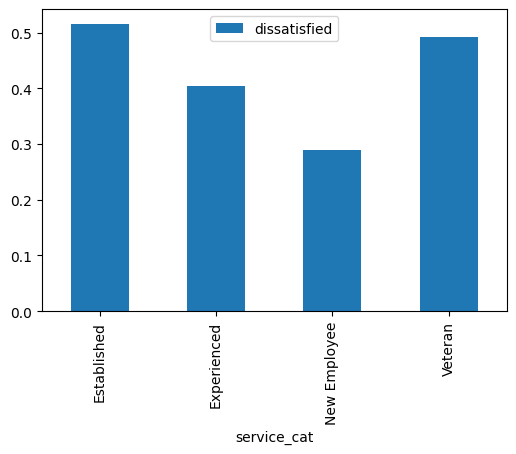

In [46]:
#Making a bar plot
cat_pt.plot(kind='bar')

Okay so it looks like so according to the bar chart the established and veteren employees were the most dissatisfied. This is interesting because they spent the most time working at their institutions. This may be due to the companies having bad long term benefits for the employees. 

#### Now I need to see if any of the other columns have missing values

In [47]:
combined_updated.isnull().sum()

id                       0
separationtype           0
cease_date              11
position                 3
employment_status        4
gender                   9
age                      5
institute_service       38
dissatisfied             0
institute                0
institute_service_up    38
service_cat             38
dtype: int64

In [48]:
combined_updated['service_cat'].value_counts(dropna=False)

New Employee    276
Veteran         134
Experienced      89
Established      62
NaN              38
Name: service_cat, dtype: int64

In [49]:
combined_updated['service_cat'] = combined_updated['service_cat'].fillna('New Employee')

In [50]:
combined_updated['service_cat'].value_counts(dropna=False)

New Employee    314
Veteran         134
Experienced      89
Established      62
Name: service_cat, dtype: int64

In [51]:
 combined_updated['institute_service_up'].value_counts(dropna=False).head()

1.0    159
3.0     83
5.0     56
NaN     38
7.0     34
Name: institute_service_up, dtype: int64

In [52]:
service_up_mean = combined_updated['institute_service_up'].mean()
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].fillna(service_up_mean)

In [53]:
service_mean = service_up_mean.astype('int64')
service_mean = service_mean.astype('str')
combined_updated['institute_service'] = combined_updated['institute_service'].fillna(service_mean)

In [54]:
cat_pt = combined_updated.pivot_table(values='dissatisfied', index='service_cat')
cat_pt

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.404494
New Employee,0.292994
Veteran,0.492537


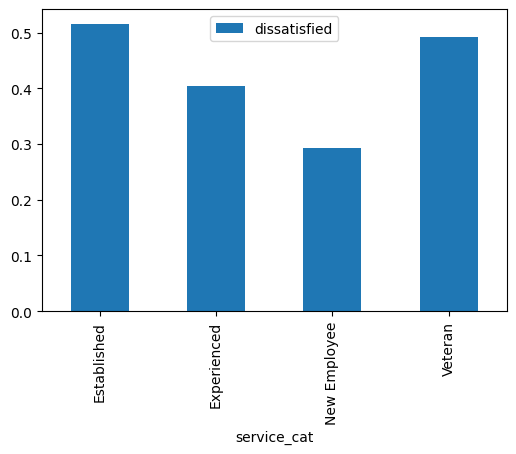

In [55]:
#Creating a bar chart for the cleaned categorie.
cat_pt.plot(kind='bar')
plt.show()

After getting rid of all of the `NaN` values in `'institute_service'` and `'institute_service_up'` and the results still look to be the same. 

**Now to clean the** `'age'` **column by making  the value type to floats.**

In [56]:
combined_updated['age'] = combined_updated['age'].astype('str').str.extract(r'(\d+)')
combined_updated['age'] = combined_updated['age'].astype('float')

In [57]:

combined_updated['age'].value_counts(dropna=False)

41.0    93
46.0    81
36.0    72
51.0    71
26.0    67
21.0    62
31.0    61
56.0    54
61.0    23
20.0    10
NaN      5
Name: age, dtype: int64

In [58]:
#Creating a function to group the 'age' values 
def age(value):
    if 20 < value <= 29:
        return '20s'
    elif 30 < value <= 39:
        return '30s'
    elif 40 <= value <=49:
        return '40s'
    elif 50 <= value <= 59:
        return '50s'
    elif 60 < value:
        return '60 and over'


age_groups = combined_updated['age'].apply(age)

In [59]:
#Creating a pivot table to group the 'dissatisfied' values in the age group values. 
age_pt = combined_updated.pivot_table(values='dissatisfied', index=age_groups)
age_pt

,dissatisfied
age,
20s,0.364341
30s,0.360902
40s,0.379310
50s,0.408000
60 and over,0.521739


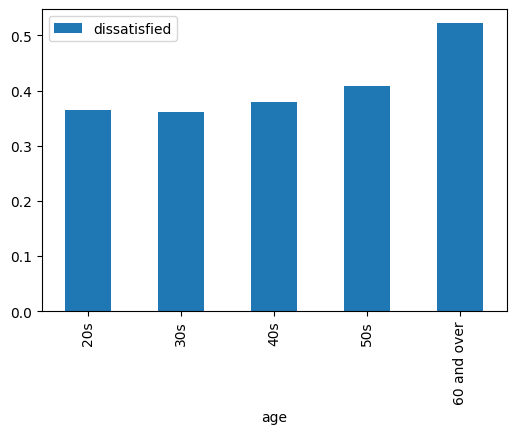

In [60]:
#displaying categorized pivot table name 'age_pt'
age_pt.plot(kind='bar')

So i grouped the age groups by the decade and it seems like it is true that it seems as if these companies aren't treating their older employees well. The trend shows that the older the employees get, the more dissatisfied they are. 

In [61]:
institute_pt = combined_updated.pivot_table(values='dissatisfied', index='institute')
institute_pt

,dissatisfied
institute,
DETE,0.479100
TAFE,0.267361


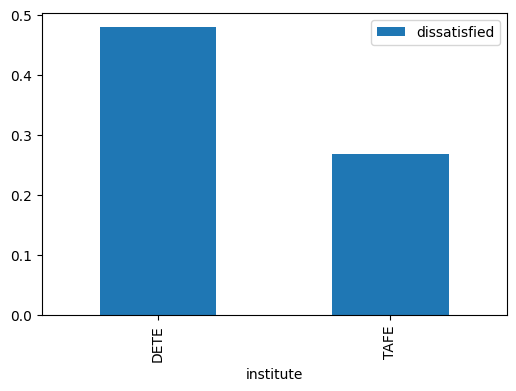

In [62]:
institute_pt.plot(kind='bar')

It looks like most of the  people were dissatisfied in the `'DETE'` institute. 

After cleaning and analyzing the data. I see that most of the employees get dissatisfied as they get older. This could mean that the companies have bad benefits for the elders. 